In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [2]:
df = pd.read_csv("./데이터구축.csv", encoding='cp949')

In [3]:
df = df.drop(columns=["계약일자", "전용면적(㎡)", "거래금액(만원)", "읍면동명", "통계년월"])

In [4]:
df.rename(columns = {'동':'법정동','용적율':'용적률'},inplace=True)
df

,구,법정동,층,건축년도,용적률,건폐율,노령화지수,전세가율,소비자물가지수,회사채,지하철역 개수,면적당가격(만원)
0,서초구,방배동,6,2003.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,909.043296
1,서초구,방배동,21,2004.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,2014.324082
2,서초구,방배동,8,2005.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,929.054054
3,서초구,방배동,11,2001.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1447.488340
4,서초구,방배동,1,1999.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1141.173541
...,...,...,...,...,...,...,...,...,...,...,...,...
9629,성동구,도선동,9,2006.0,381.374000,58.717333,3.266667,53.26,106.85,274849.0,4,1401.738155
9630,성동구,도선동,26,2006.0,381.374000,58.717333,3.099502,53.09,104.69,358045.0,4,1277.823578
9631,성북구,성북동1가,13,2015.0,126.286000,49.842000,3.177570,61.53,106.06,248908.0,1,1352.181930
9632,중구,장충동2가,2,1981.0,158.240000,41.712500,3.370370,61.42,106.06,248908.0,1,432.206344


In [5]:
df.to_csv("final_dataset.csv", index=False)

In [7]:
sample = df[df["구"] == "서초구"]

In [8]:
sample.drop(columns=["구"])

,동,층,건축년도,용적율,건폐율,노령화지수,전세가율,소비자물가지수,회사채,지하철역 개수,면적당가격(만원)
0,방배동,6,2003.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,909.043296
1,방배동,21,2004.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,2014.324082
2,방배동,8,2005.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,929.054054
3,방배동,11,2001.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1447.488340
4,방배동,1,1999.0,203.779846,52.418604,1.520693,52.87,109.21,271190.0,36,1141.173541
...,...,...,...,...,...,...,...,...,...,...,...
9431,양재동,10,1996.0,199.559975,51.447725,1.528296,53.32,104.69,358045.0,4,1853.819813
9432,양재동,3,2001.0,199.559975,51.447725,1.528296,53.32,104.69,358045.0,4,1284.403670
9433,양재동,1,2002.0,199.559975,51.447725,1.528296,53.32,104.69,358045.0,4,1059.484299
9434,양재동,3,2001.0,199.559975,51.447725,1.528296,53.32,104.69,358045.0,4,1101.532567


### 가격 데이터셋 구축

In [2]:
df1 = pd.read_csv("./아파트 가격/2020실거래가_처리후.csv", encoding='cp949')
df2 = pd.read_csv("./아파트 가격/2021실거래가_처리후.csv", encoding='cp949')
df3 = pd.read_csv("./아파트 가격/2022실거래가_처리후.csv", encoding='cp949')

df = pd.concat([df1, df2, df3])
df = df.drop(columns = ["번지", "본번", "부번", "단지명", "도로명", "해제사유발생일", "거래유형"])
test = df["계약일자"].astype(str)
test2 = test.to_frame()
test2["계약년도"] = test.str[:4].astype(int)
test2["계약월"] = test.str[4:6].astype(int)
test2["계약일자"] = test2["계약일자"].astype(int)
test2 = test2.drop(columns=['계약일자'])

basic_df = pd.concat([df, test2], axis=1)
basic_df = basic_df.sort_values("계약일자", ascending=False)

In [3]:
basic_df = basic_df.drop(columns = ["계약년도", "계약월"])
basic_df

,계약일자,구,동,전용면적(㎡),거래금액(만원),층,건축년도
6441,20221031,서초구,방배동,114.5600,104140,6,2003.0
1563,20221031,강서구,방화동,84.0164,38000,11,2002.0
10136,20221031,중랑구,망우동,83.6100,50000,5,2002.0
9016,20221031,영등포구,영등포동4가,12.1000,12950,6,2012.0
9198,20221031,용산구,한강로1가,99.8500,160000,6,2005.0
...,...,...,...,...,...,...,...
51531,20200101,서대문구,홍제동,59.9400,44500,2,2002.0
16566,20200101,관악구,봉천동,61.7400,50000,1,1988.0
76917,20200101,은평구,대조동,27.5100,26900,7,2018.0
51950,20200101,서대문구,홍제동,59.9300,60000,6,2000.0


### 용적율, 건폐율 데이터 추가

In [4]:
df = pd.read_csv("./동별 건폐율 용적율.csv", encoding='cp949')
df = df[["법정동_코드", "건폐율", "용적율"]]

In [5]:
yong = df.groupby(["법정동_코드"])["용적율"].mean()
gun = df.groupby(["법정동_코드"])["건폐율"].mean()

In [6]:
df_2 = pd.merge(basic_df, yong, left_on = '동', right_on = '법정동_코드', how='inner')
df_3 = pd.merge(df_2, gun, left_on = '동', right_on = '법정동_코드', how='inner')

In [7]:
df_3

,계약일자,구,동,전용면적(㎡),거래금액(만원),층,건축년도,용적율,건폐율
0,20221031,서초구,방배동,114.56,104140,6,2003.0,203.779846,52.418604
1,20221014,서초구,방배동,134.04,270000,21,2004.0,203.779846,52.418604
2,20221012,서초구,방배동,29.60,27500,8,2005.0,203.779846,52.418604
3,20221008,서초구,방배동,186.53,270000,11,2001.0,203.779846,52.418604
4,20221008,서초구,방배동,240.98,275000,1,1999.0,203.779846,52.418604
...,...,...,...,...,...,...,...,...,...
136454,20200703,용산구,청파동1가,61.35,46000,6,2004.0,161.540833,59.669167
136455,20200626,중구,남산동2가,108.78,81500,5,2003.0,165.662500,73.035000
136456,20200529,중구,남산동2가,80.76,48000,1,2003.0,165.662500,73.035000
136457,20200319,용산구,갈월동,108.55,105000,2,2004.0,348.223750,62.230000


### 인구 데이터 추가

In [8]:
population = pd.read_csv("./인구 데이터/서울시 지역별 성별 연령별 주민등록 인구수 합.csv")

In [9]:
population["노령화지수"] = (population["만65-69세남자"] + population["만70세이상남자"] + population["만65-69세여자"] + population["만70세이상여자"]) / (population["만0-4세남자"] + population["만5-9세남자"] + population["만10-14세남자"] + population["만0-4세여자"] + population["만5-9세여자"] + population["만10-14세여자"])

In [10]:
population = population[["읍면동명", "통계년월", "노령화지수"]]
#population = population.drop(columns=["시도명", "시군구명", "계", "남자", "여자"]) #상관관계 히트맵 용도

In [11]:
population1=population[population["통계년월"]=="2022-01-31"]
population2=population[population["통계년월"]=="2022-01-31"]
population3=population[population["통계년월"]=="2022-03-31"]
population4=population[population["통계년월"]=="2022-04-30"]
population5=population[population["통계년월"]=="2022-05-31"]
population6=population[population["통계년월"]=="2022-06-30"]
population7=population[population["통계년월"]=="2022-07-31"]
population8=population[population["통계년월"]=="2022-08-22"]
population9=population[population["통계년월"]=="2022-09-30"]
population10=population[population["통계년월"]=="2022-10-31"]

In [12]:
base1=df_3[round(df_3["계약일자"],-2)/100==202201]
base2=df_3[round(df_3["계약일자"],-2)/100==202202]
base3=df_3[round(df_3["계약일자"],-2)/100==202203]
base4=df_3[round(df_3["계약일자"],-2)/100==202204]
base5=df_3[round(df_3["계약일자"],-2)/100==202205]
base6=df_3[round(df_3["계약일자"],-2)/100==202206]
base7=df_3[round(df_3["계약일자"],-2)/100==202207]
base8=df_3[round(df_3["계약일자"],-2)/100==202208]
base9=df_3[round(df_3["계약일자"],-2)/100==202209]
base10=df_3[round(df_3["계약일자"],-2)/100==202210]

In [13]:
join_df1=pd.merge(base1,population1,left_on="동",right_on="읍면동명",how='inner')
join_df2=pd.merge(base2,population2,left_on="동",right_on="읍면동명",how='inner')
join_df3=pd.merge(base3,population3,left_on="동",right_on="읍면동명",how='inner')
join_df4=pd.merge(base4,population4,left_on="동",right_on="읍면동명",how='inner')
join_df5=pd.merge(base5,population5,left_on="동",right_on="읍면동명",how='inner')
join_df6=pd.merge(base6,population6,left_on="동",right_on="읍면동명",how='inner')
join_df7=pd.merge(base7,population7,left_on="동",right_on="읍면동명",how='inner')
join_df8=pd.merge(base8,population8,left_on="동",right_on="읍면동명",how='inner')
join_df9=pd.merge(base9,population9,left_on="동",right_on="읍면동명",how='inner')
join_df10=pd.merge(base10,population10,left_on="동",right_on="읍면동명",how='inner')

In [14]:
df_4 = pd.concat([join_df10, join_df9, join_df8, join_df7, join_df6, join_df5, join_df4, join_df3, join_df2, join_df1])

In [15]:
df_4

,계약일자,구,동,전용면적(㎡),거래금액(만원),층,건축년도,용적율,건폐율,읍면동명,통계년월,노령화지수
0,20221031,서초구,방배동,114.56,104140,6,2003.0,203.779846,52.418604,방배동,2022-10-31,1.520693
1,20221014,서초구,방배동,134.04,270000,21,2004.0,203.779846,52.418604,방배동,2022-10-31,1.520693
2,20221012,서초구,방배동,29.60,27500,8,2005.0,203.779846,52.418604,방배동,2022-10-31,1.520693
3,20221008,서초구,방배동,186.53,270000,11,2001.0,203.779846,52.418604,방배동,2022-10-31,1.520693
4,20221008,서초구,방배동,240.98,275000,1,1999.0,203.779846,52.418604,방배동,2022-10-31,1.520693
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,20220103,중구,오장동,14.37,25000,13,2020.0,282.000000,49.940000,오장동,2022-01-31,15.600000
1125,20220101,중구,오장동,14.37,25000,14,2020.0,282.000000,49.940000,오장동,2022-01-31,15.600000
1126,20220101,중구,오장동,14.37,25000,15,2020.0,282.000000,49.940000,오장동,2022-01-31,15.600000
1127,20220111,종로구,연지동,18.02,20000,10,2015.0,276.575710,54.578770,연지동,2022-01-31,4.000000


In [18]:
df_4.to_csv("df_population_added.csv")

In [41]:
#heatmap= df_4.drop(columns=["계약일자", "구", "동", "읍면동명", "통계년월"])

#plt.rc('font', family='Malgun Gothic')
#colormap = plt.cm.PuBu
#plt.figure(figsize=(100, 100))
#plt.title("상관관계 히트맵", y = 1.05, size = 15)
#sns.heatmap(heatmap.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
#           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

C:\Users\chanw\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'상관관계 히트맵'}>

C:\Users\chanw\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\chanw\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'상관관계 히트맵'}>

C:\Users\chanw\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


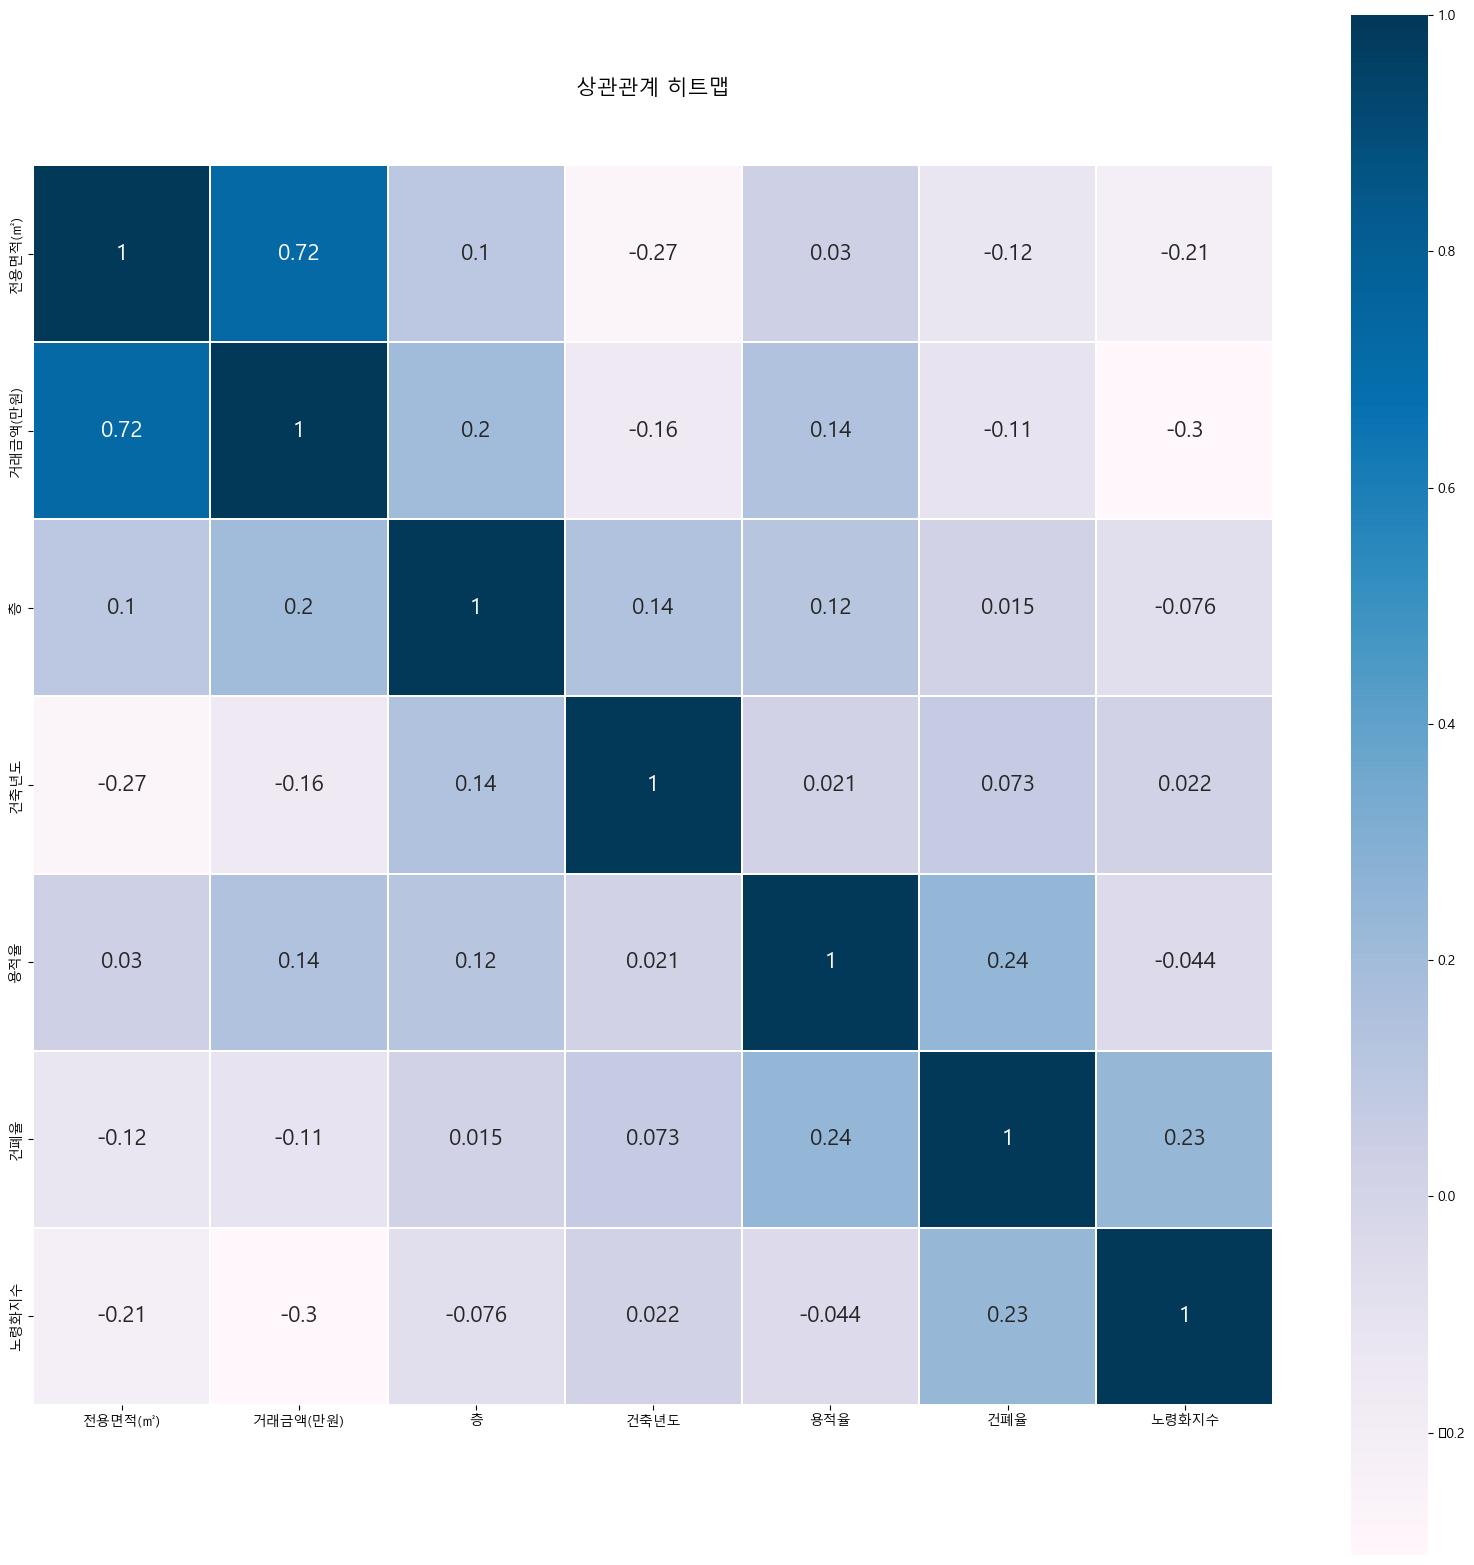

In [65]:
heatmap= df_4.drop(columns=["계약일자", "구", "동", "읍면동명", "통계년월"])

plt.rc('font', family='Malgun Gothic')
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 20))
plt.title("상관관계 히트맵", y = 1.05, size = 15)
sns.heatmap(heatmap.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [8]:
#basic_df.columns = ['date', 'gu', 'dong', 'exclusive_area(square_meter)', 'price(ten_thousand_won)', 'floor', 'year_built', 'near_metro_number']
#basic_df["unit_price"] = basic_df["price(ten_thousand_won)"] / basic_df["exclusive_area(square_meter)"]
#basic_df.to_csv("data.csv", index=False)